In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Download dataset from "https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data"
data = pd.read_csv('input/train.csv')

In [3]:
print(data)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fe

In [4]:
print(data['GrLivArea'])
print(data['SalePrice'])

0       1710
1       1262
2       1786
3       1717
4       2198
        ... 
1455    1647
1456    2073
1457    2340
1458    1078
1459    1256
Name: GrLivArea, Length: 1460, dtype: int64
0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64


In [5]:
#Grab the relevant data, scale the predictor variable, and add a column of 1s for the gradient descent...
x_ = data['GrLivArea']
y = data['SalePrice']

x = (x_ - x_.mean()) / x_.std() #normalization
x = np.c_[np.ones(x.shape[0]), x] 

In [6]:
#GRADIENT DESCENT
alpha = 0.01 #Step size
iterations = 2000 #No. of iterations
m = y.size #No. of data points
np.random.seed(123) #Set the seed
theta = np.random.rand(2) #Pick some random values to start with

#GRADIENT DESCENT
def gradient_descent(x, y, theta, iterations, alpha):
    past_costs = []
    past_thetas = [theta]
    for i in range(iterations):
        # Dot product needed
        prediction = np.dot(x, theta) #x=[1,2,3,4] -> x=[[1,1],[1,2],[1,3],[1,4]] , theta=[0.1, 0.2] --> [0.1+1*0.2, 0.1+2*0.2, ...]
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error) #error=[1,2,3] --> ...=1^2+2^2+3^3
        past_costs.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))
        past_thetas.append(theta)
        
    return past_thetas, past_costs

#Pass the relevant variables to the function and get the new values back
#upgrade theta by GRADIENT DESCENT!!
past_thetas, past_costs = gradient_descent(x, y, theta, iterations, alpha)
theta = past_thetas[-1]

#Print the results...
print("Gradient Descent: {:.2f}, {:.2f}".format(theta[0], theta[1]))

Gradient Descent: 180921.20, 56294.90


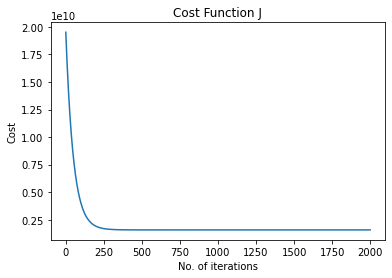

In [7]:
#Plot the cost function...
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(past_costs)
plt.show()

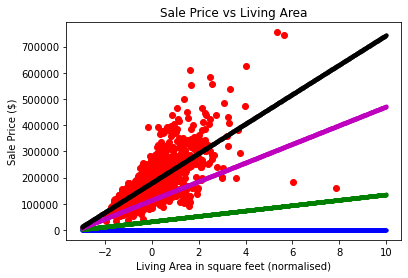

In [8]:
#Set the plot up,
fig = plt.figure()
ax = plt.axes()
plt.title('Sale Price vs Living Area')
plt.xlabel('Living Area in square feet (normalised)')
plt.ylabel('Sale Price ($)')
plt.scatter(x[:,1], y, color='red')

x1 = np.linspace(-3, 10, 1000)
#0, 20, 100 mean iterations
y1 = past_thetas[0][1]*x1 + past_thetas[0][0]
y2 = past_thetas[20][1]*x1 + past_thetas[20][0]
y3 = past_thetas[100][1]*x1 + past_thetas[100][0]
y4 = past_thetas[-1][1]*x1 + past_thetas[-1][0]
plt.plot(x1, y1, 'b.')
plt.plot(x1, y2, 'g.')
plt.plot(x1, y3, 'm.')
plt.plot(x1, y4, 'k.')

plt.show()
plt.close()

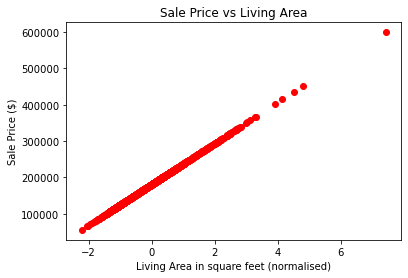

In [10]:
data_ = pd.read_csv('input/test.csv')
x_ = data_['GrLivArea']
x = (x_ - x_.mean()) / x_.std()
x = np.c_[np.ones(x.shape[0]), x]
y = np.dot(x, theta)

fig = plt.figure()
ax = plt.axes()
plt.title('Sale Price vs Living Area')
plt.xlabel('Living Area in square feet (normalised)')
plt.ylabel('Sale Price ($)')
plt.scatter(x[:,1], y, color='red')
plt.show()
plt.close()